In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

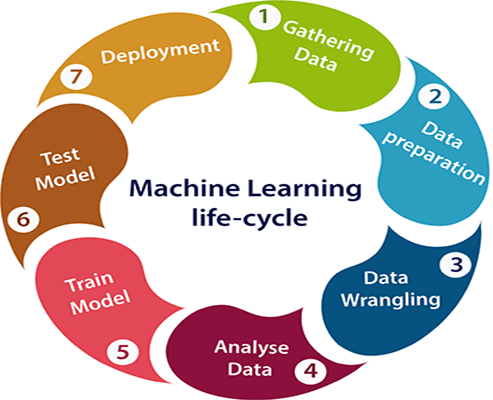

Importing dataset
1 Since data is in form of excel file we have to use pandas read_excel to load the data

2 After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

3 Check whether any null values are there or not. if it is present then following can be done,
Imputing data using Imputation method in sklearn

4 Filling NaN values with mean, median and mode using fillna() method

5 Describe data --> which can give statistical analysis

In [4]:
train_data = pd.read_excel("C:/Users/NOOMAN KHAN/Desktop/Data_Train.xlsx")
train_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/NOOMAN KHAN/Desktop/Data_Train.xlsx'

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df = train_data.copy()

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
pd.set_option("display.max_columns" , None)

In [11]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
for i in df.columns:
    print(df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


In [12]:
df.shape

(10682, 11)

In [13]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

##### EDA

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction


For this we require pandas to_datetime to convert object data type to datetime dtype.


.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [14]:
df["Journey_Day"] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.day

In [15]:
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.month

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# we have extract month and day from Date_of_journey know we can easily drop it
df = df.drop(["Date_of_Journey"] , axis = 1)

In [18]:
# now we have to extract hours and minute from Dep_Time/Arrival Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_minutr"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [19]:
df = df.rename(columns = {"Arr_minutr":"Arr_min"})

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
df = df.drop(["Dep_Time","Arrival_Time"],axis = 1)

In [100]:
df

,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [23]:
duration = list(df["Duration"])
duration[1].split()
 
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h "+duration[i]
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(duration[i].split("h")[0])
    duration_min.append(duration[i].split("m")[0].split()[-1])
    
            

In [24]:
len(duration_hour),len(duration_min)

(10682, 10682)

In [25]:
df["duration_hour"] = duration_hour
df["duration_min"] = duration_min

In [26]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arr_hour            int64
Arr_min             int64
duration_hour      object
duration_min       object
dtype: object

In [27]:
df = df.drop(["Duration"],axis = 1)

In [28]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


#### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case


Ordinal data --> data are in order --> LabelEncoder is used in this case

In [29]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

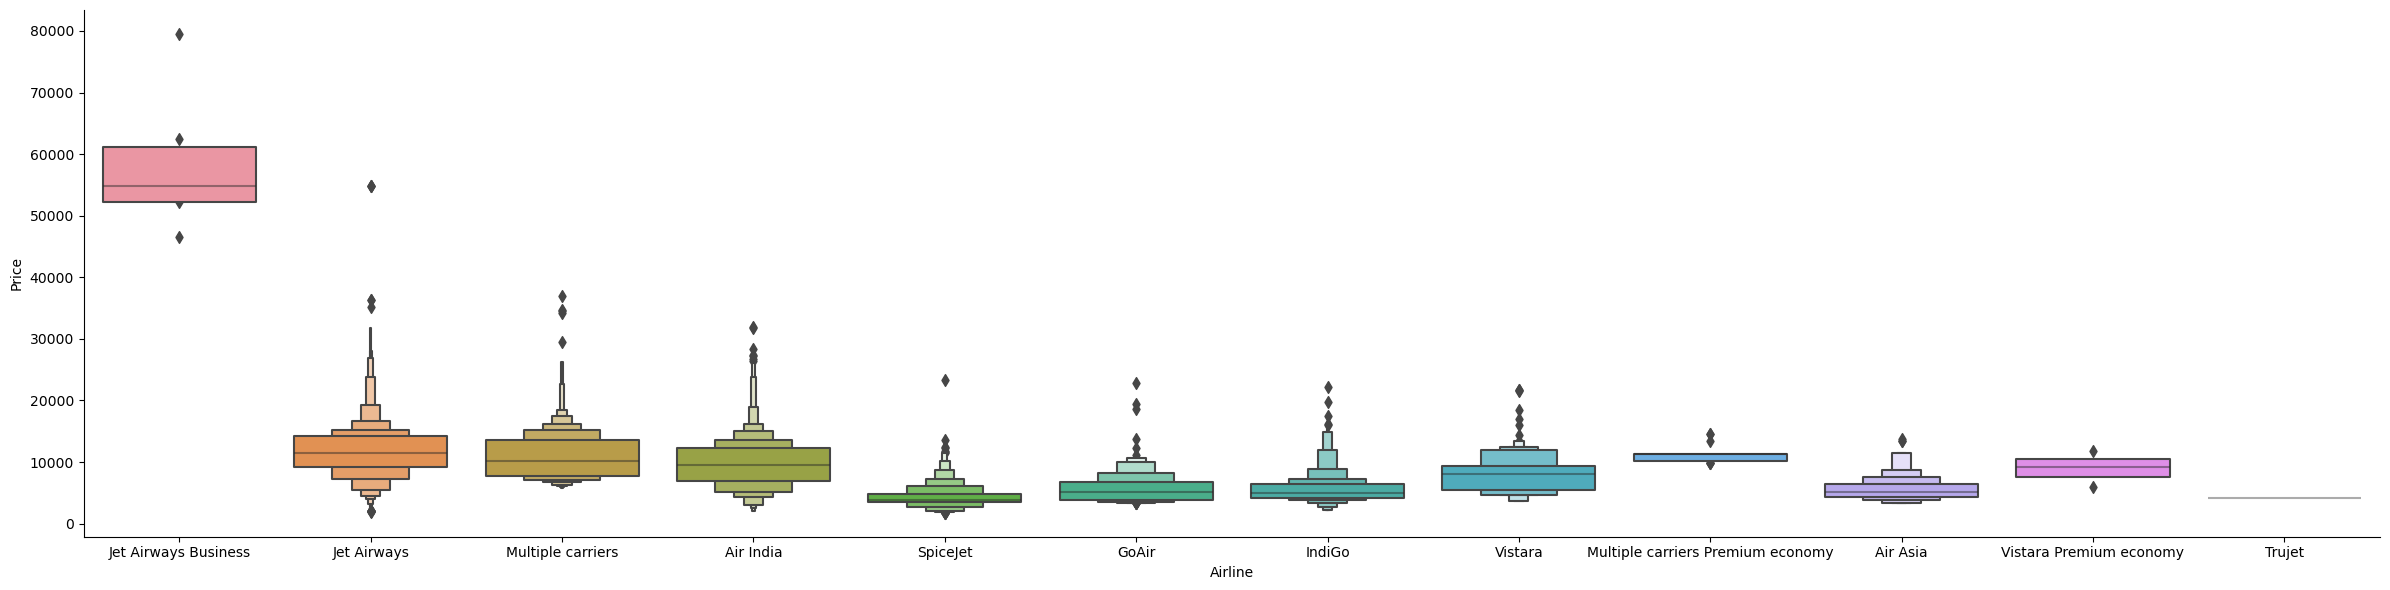

In [30]:
sns.catplot(x = "Airline" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 4,
           kind = "boxen")
plt.show()

In [31]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(data = Airline  , drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

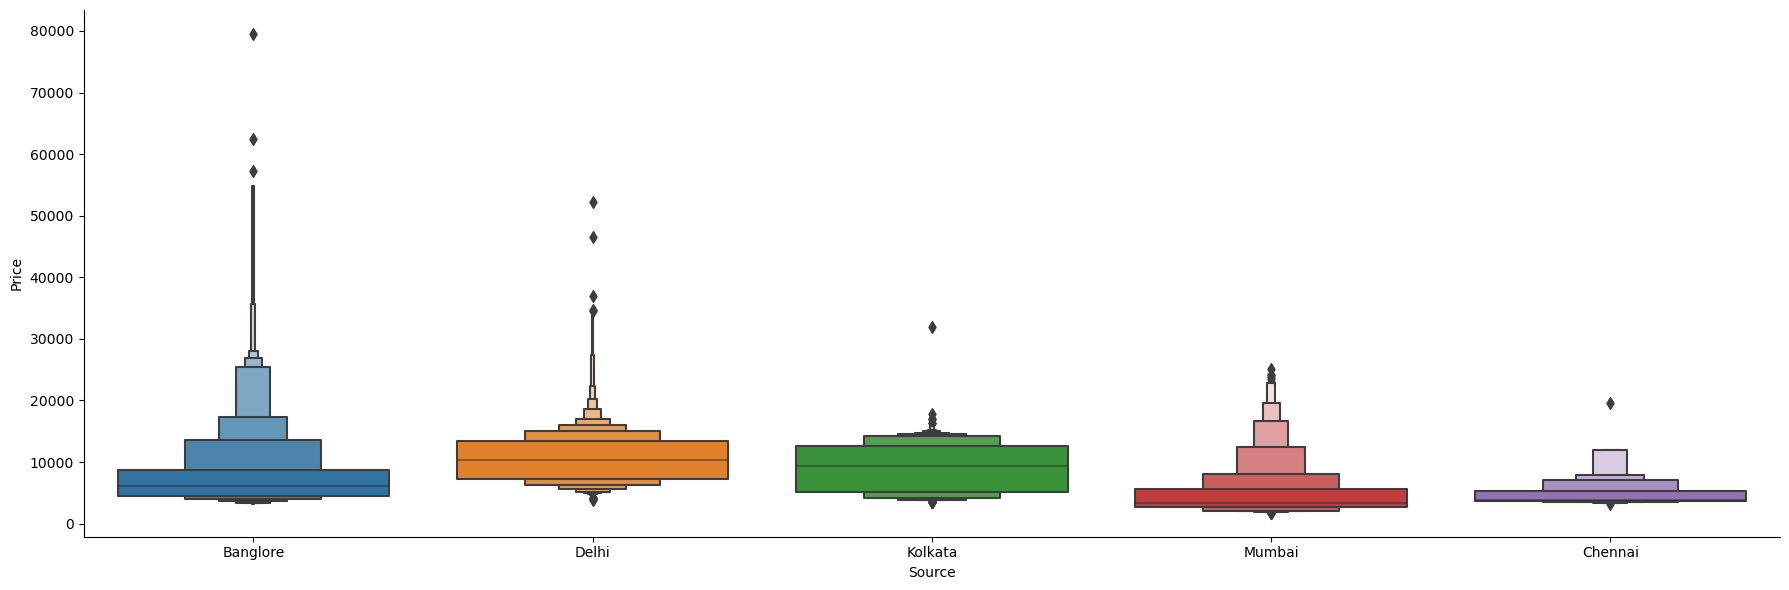

In [33]:
sns.catplot(x = "Source" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 3,
           kind = "boxen")
plt.show()

In [34]:
Source = df[["Source"]]
Source = pd.get_dummies(data =  Source  , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [35]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

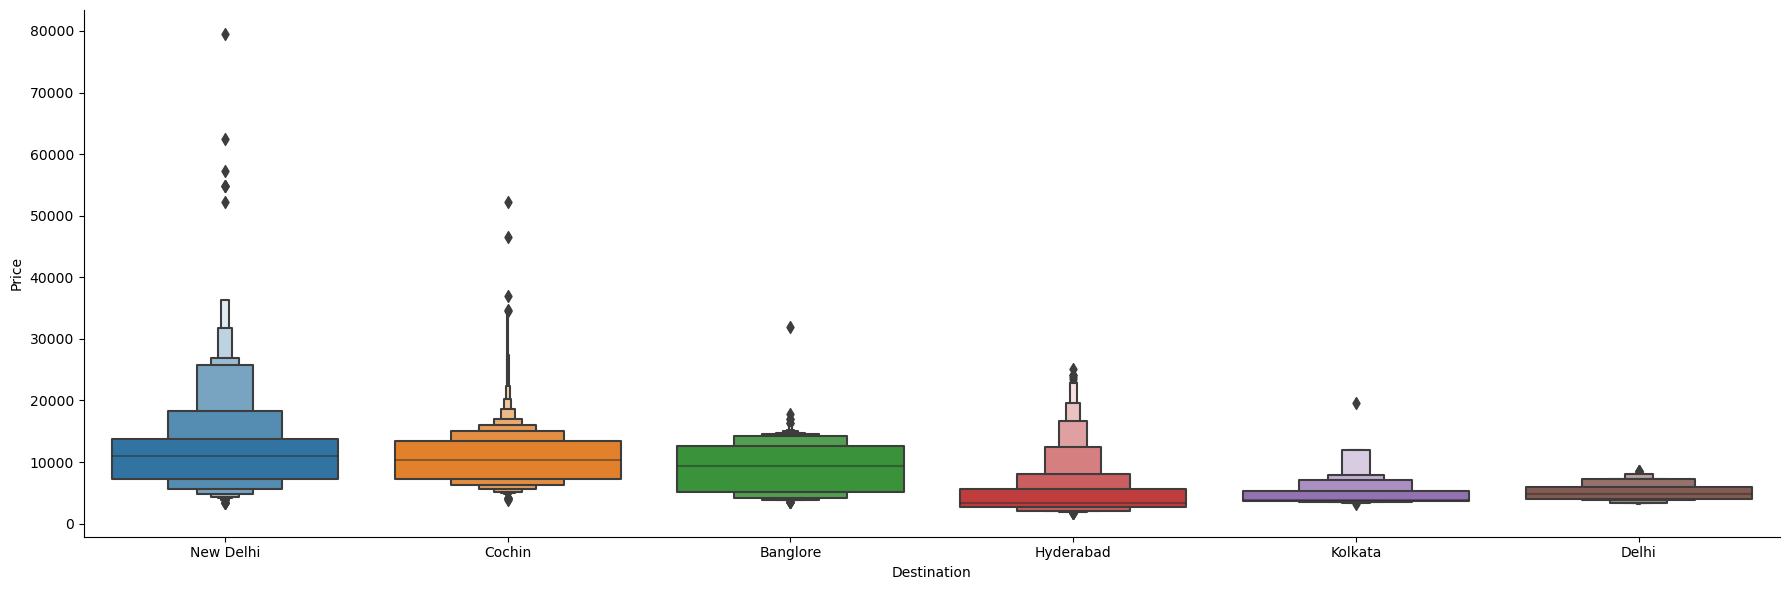

In [36]:
sns.catplot(x = "Destination" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 3,
           kind = "boxen")
plt.show()

In [37]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(data =  Destination  , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
# this is ordinal feature we have to do label encoding
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

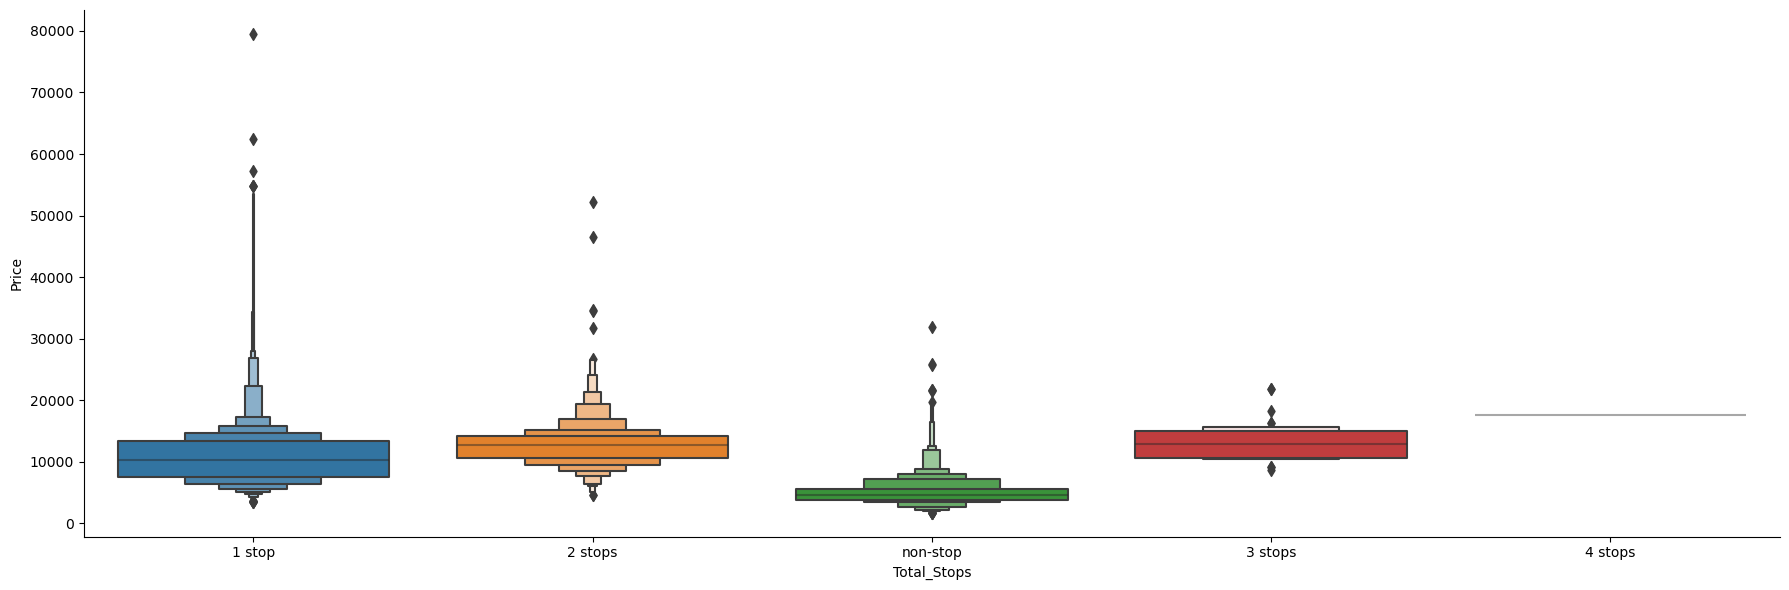

In [39]:
sns.catplot(x = "Total_Stops" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 3,
           kind = "boxen")
plt.show()

In [40]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
df = df.replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})

In [42]:
df["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [43]:
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [44]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [45]:
# 128 different categries if we do encoding our data become so complex
# in Additional info 80% data is No info does'nt make ant sence
df = df.drop(["Route","Additional_Info"],axis = 1)

In [46]:
df = df.drop(["Airline","Source","Destination"] , axis = 1)

In [47]:
F_data = df

In [48]:
df = pd.concat([df,Airline,Source,Destination] , axis = 1)

In [49]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
df.shape

(10682, 30)

In [51]:
df[["duration_hour","duration_min"]] = df[["duration_hour","duration_min"]].astype("int64")

In [52]:
X_train = df.drop("Price",axis = 1)
Y_train = df[["Price"]]

In [53]:
X_train = X_train.drop(["Airline_Trujet"],axis=1) 

In [54]:
X_train.shape

(10682, 28)

In [55]:
df1 = pd.read_excel("C:/Users/NOOMAN KHAN/Downloads/Test_set.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [56]:

df1["Journey_Day"] = pd.to_datetime(df1.Date_of_Journey,format = "%d/%m/%Y").dt.day
df1["Journey_month"] = pd.to_datetime(df1.Date_of_Journey,format = "%d/%m/%Y").dt.month
df1 = df1.drop(["Date_of_Journey"] , axis = 1)

df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute
df1["Arr_hour"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["Arr_minutr"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour

df1 = df1.rename(columns = {"Arr_minutr":"Arr_min"})

df1 = df1.drop(["Dep_Time","Arrival_Time"],axis = 1)

duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h "+duration[i]
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(duration[i].split("h")[0])
    duration_min.append(duration[i].split("m")[0].split()[-1])
    
    
df1["duration_hour"] = duration_hour
df1["duration_min"] = duration_min

df1 = df1.drop(["Duration"],axis = 1)


Airline = df1[["Airline"]]
Airline = pd.get_dummies(data = Airline  , drop_first=True)

Source = df1[["Source"]]
Source = pd.get_dummies(data =  Source  , drop_first=True)


Destination = df1[["Destination"]]
Destination = pd.get_dummies(data =  Destination  , drop_first=True)


df1 = df1.replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})


df1 = df1.drop(["Route","Additional_Info"],axis = 1)

df1 = df1.drop(["Airline","Source","Destination"] , axis = 1)

df1 = pd.concat([df1,Airline,Source,Destination] , axis = 1)
df1


,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,4,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,19,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,21,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,2,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,20,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,16,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,4,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,19,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [57]:
df1.isnull().sum()

Total_Stops                                  0
Journey_Day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arr_hour                                     0
Arr_min                                      0
duration_hour                                0
duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkat

Feature Selection

df

In [58]:
F_data.dtypes

Total_Stops       int64
Price             int64
Journey_Day       int64
Journey_month     int64
Dep_hour          int64
Dep_min           int64
Arr_hour          int64
Arr_min           int64
duration_hour    object
duration_min     object
dtype: object

In [59]:
F_data[["duration_hour","duration_min"]] = F_data[["duration_hour","duration_min"]].astype("int64")

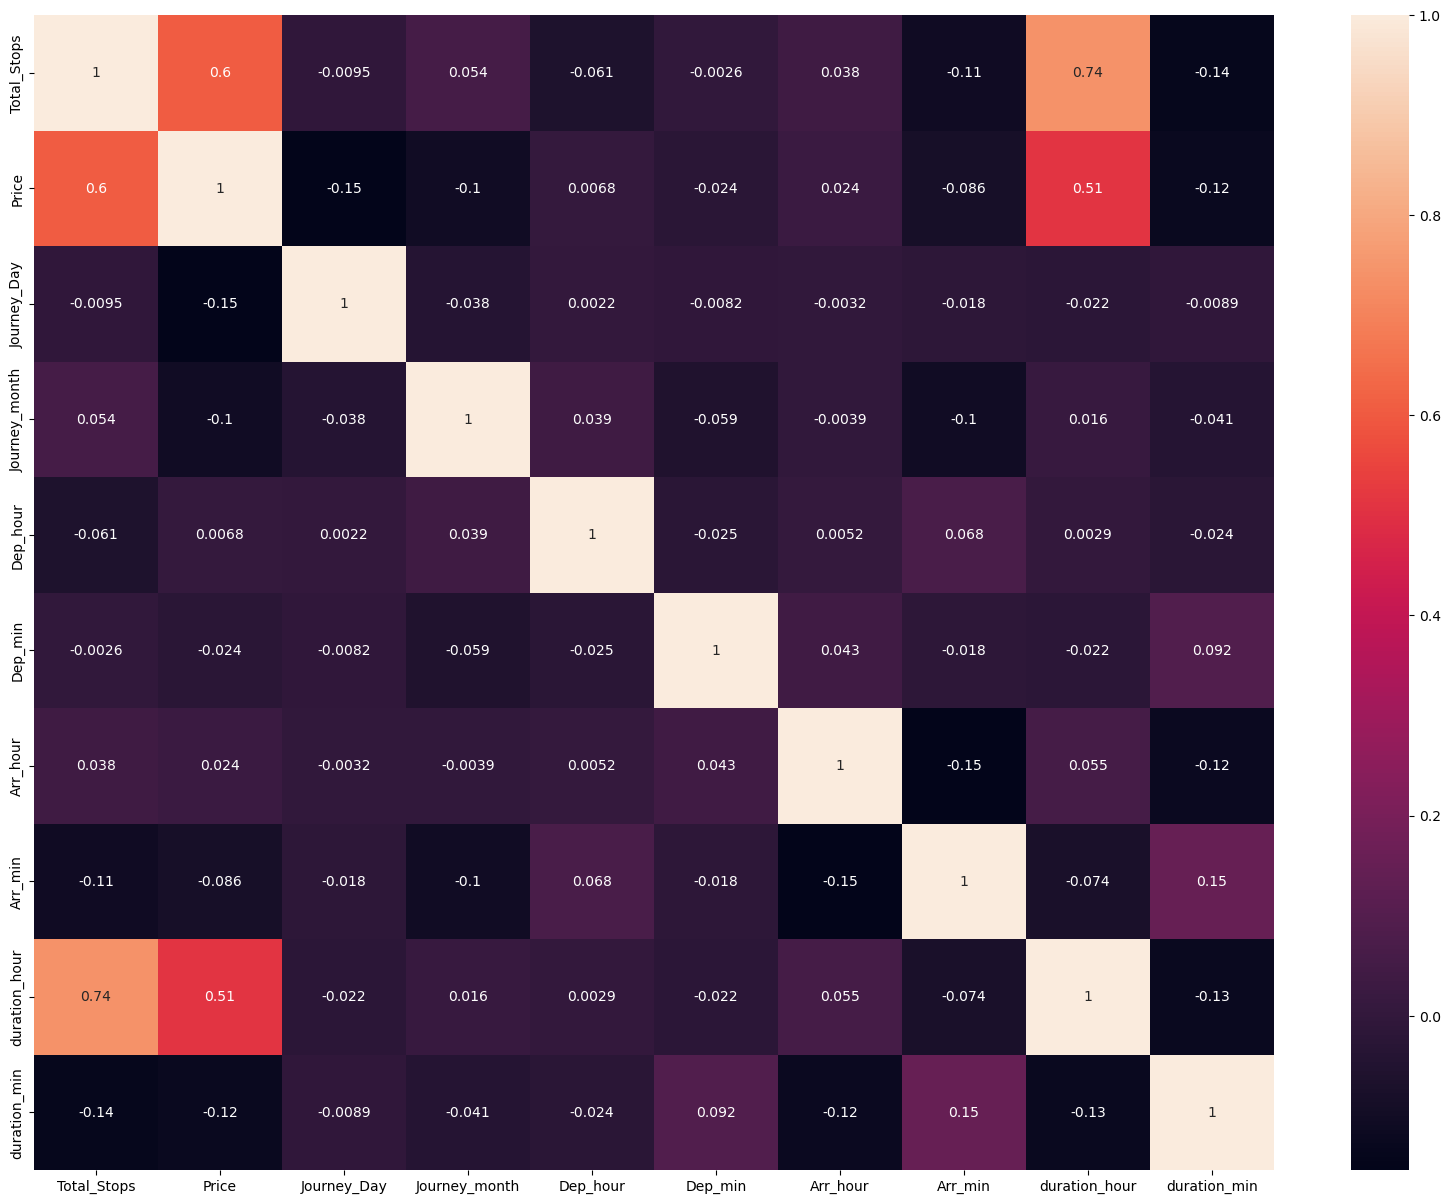

In [60]:
plt.figure(figsize = (20,15))
sns.heatmap(F_data.corr(),annot = True)
plt.show()

In [61]:
# imp feature using ExtraTreeRegressor

In [62]:
from sklearn.ensemble import  ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12108\1158080014.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X_train , Y_train)


ExtraTreesRegressor()

In [63]:
selection.feature_importances_

array([2.12492222e-01, 1.43920617e-01, 5.28528834e-02, 2.38992308e-02,
       2.16977769e-02, 2.73886727e-02, 1.93949250e-02, 1.25797847e-01,
       1.74342128e-02, 1.03443785e-02, 1.84676275e-03, 1.75953836e-02,
       1.45582491e-01, 6.74404912e-02, 1.80895793e-02, 8.86156884e-04,
       2.75415531e-03, 4.86023613e-03, 8.73130513e-05, 5.56871385e-04,
       1.24535350e-02, 3.51268856e-03, 6.66740051e-03, 1.03489629e-02,
       1.96533641e-02, 6.96304585e-03, 4.39996980e-04, 2.50387995e-02])

In [64]:
sum(selection.feature_importances_)

1.0000000000000002

In [65]:
feat_importan = pd.Series(data = selection.feature_importances_,index = X_train.columns)

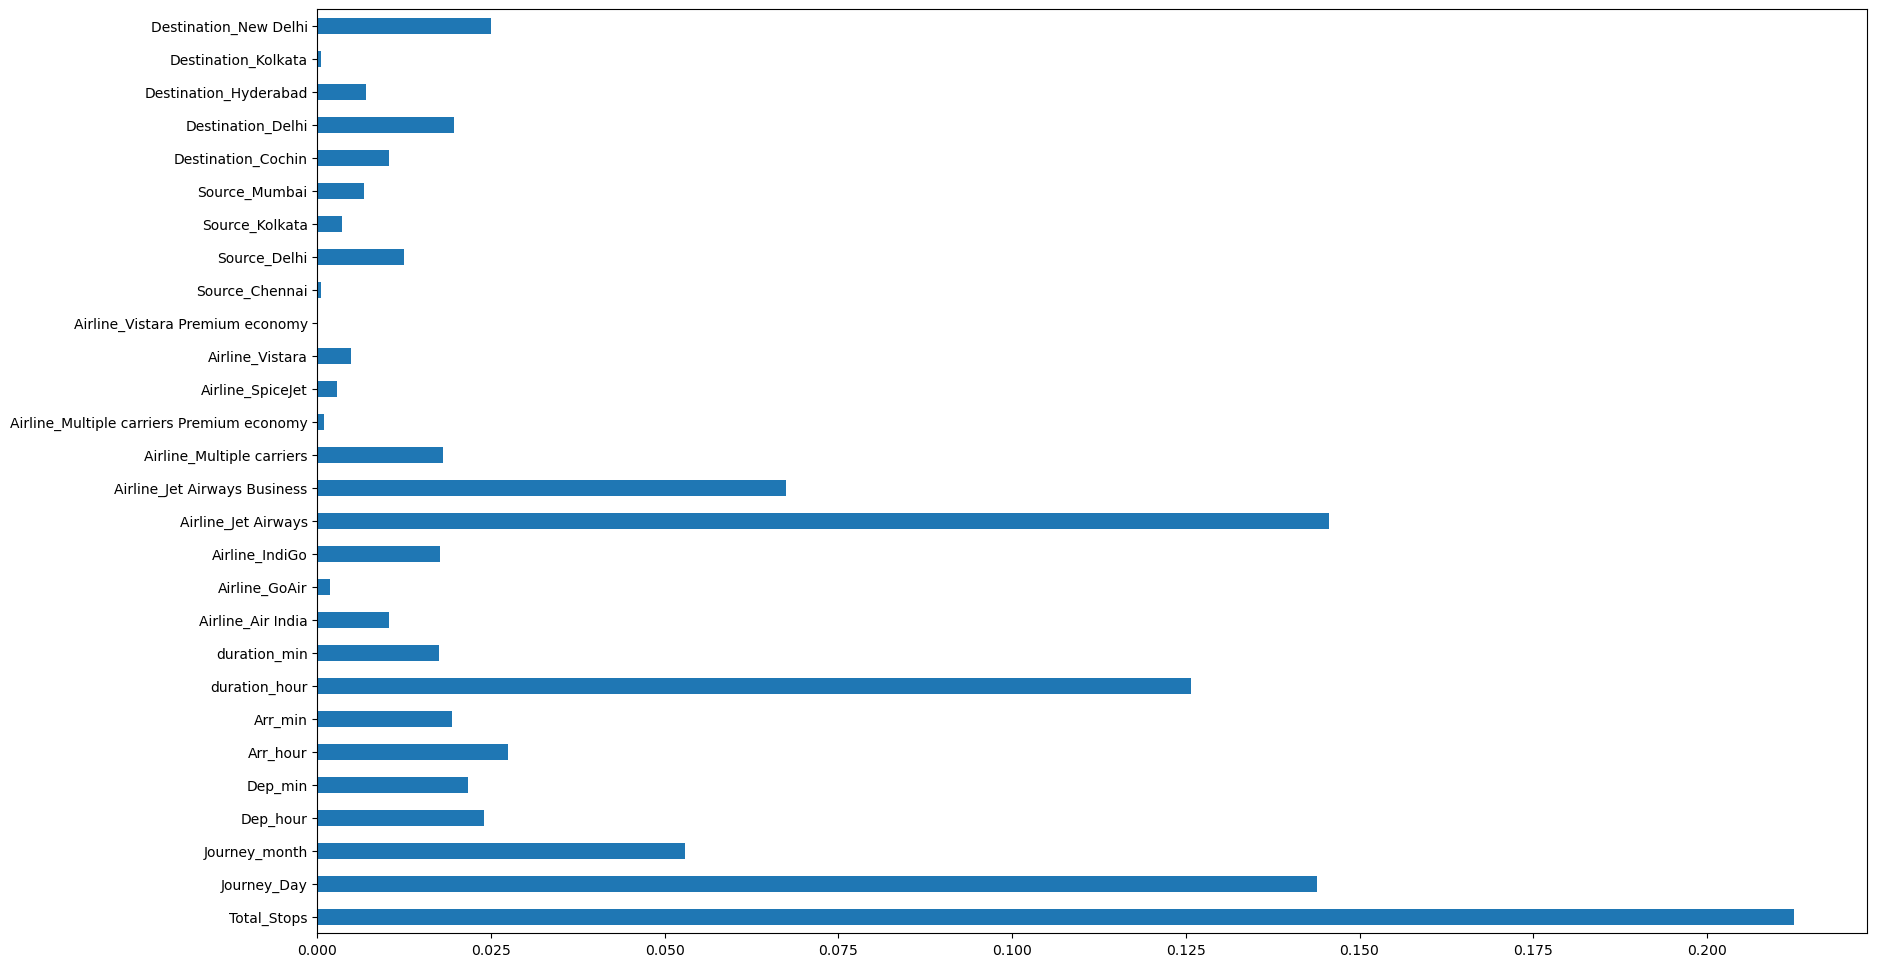

In [66]:
plt.figure(figsize = (20,12))
feat_importan.plot(kind = "barh")
plt.show()

Model Building using Random Forest

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train , test_size = 0.2,random_state = 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12108\3128809939.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestRegressor()

In [69]:
Y_pred = model.predict(X_test)

In [70]:
# testing accuracy
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.7967508439811719

In [71]:
# training accuracy
Y_pred_t = model.predict(X_train)
metrics.r2_score(Y_train,Y_pred_t)

0.9533074372148894

In [72]:
Y_test

,Price
6075,16655
3544,4959
9291,9187
5032,3858
2483,12898
...,...
9797,7408
9871,4622
10063,7452
8802,8824


In [73]:
Y_pred

array([16910.91      ,  5430.42      ,  8933.11      , ...,
        6636.53      , 12413.50583333, 13312.87333333])

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12108\3746429491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = Y_test.values.ravel()-Y_pred)


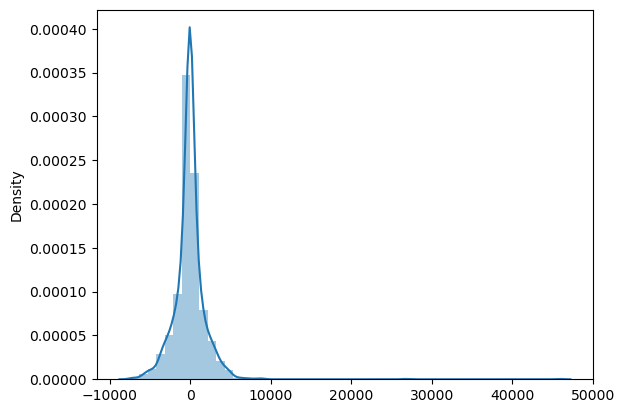

In [74]:
sns.distplot(x = Y_test.values.ravel()-Y_pred)
plt.show()


In [75]:
# sns.scatterplot(Y_test.values.ravel(),Y_pred , alpha = 0.3)
# plt.xlabel("Y_test")
# plt.ylabel("Y_pred")
# plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [76]:
Y_test = Y_test.values.ravel()

In [77]:
print("MAE  ", metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE  ", metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE  " ,np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))


MAE   1177.635937991959
MSE   4382469.749916318
RMSE   2093.434916570448


Hyperparameter Tuning

Choose following method for hyperparameter tuning

RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [80]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [81]:
Random_grid = RandomizedSearchCV(estimator = model,param_distributions=random_grid,cv=5,n_jobs=-1
                                ,n_iter=50,verbose = 2)

In [82]:
Random_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [83]:
Random_grid.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [84]:
RFR = RandomForestRegressor(n_estimators=1200,
 min_samples_split=5,
 min_samples_leaf=2,
max_features='auto',
 max_depth = 15)

In [85]:
RFR.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12108\3793850730.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train,Y_train)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1200)

In [86]:
Y_pred = RFR.predict(X_test)

In [87]:
metrics.r2_score(Y_test,Y_pred)

0.8164384845365875

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12108\1195640611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = Y_test-Y_pred)


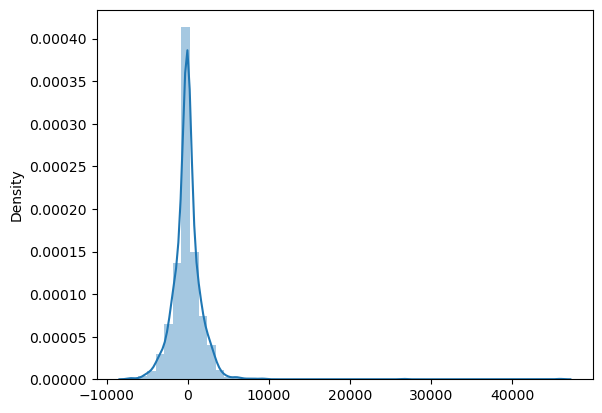

In [88]:
sns.distplot(x = Y_test-Y_pred)
plt.show()

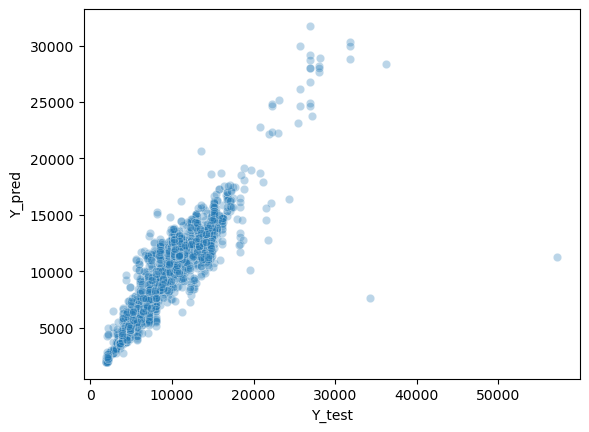

In [90]:
sns.scatterplot(x = Y_test,y = Y_pred , alpha = 0.3)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [91]:
print("MAE  ", metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE  ", metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE  " ,np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE   1138.1553100938484
MSE   3957963.735370596
RMSE   1989.4631776865326


In [113]:
Flight_Price("2022-12-10T20:18","2022-12-10T10:20",2,"Air India","Mumbai","Delhi")

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12822.78867301])

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
learning_rate = [float(x) for x in np.linspace(0.1,1,10)]
n_estimators = [int(x) for x in np.linspace(100,1000,10)]
subsample = [float(x) for x in np.linspace(0.1,1,10)]
criterion = ['friedman_mse', 'squared_error', 'mse']
min_samples_split = [2,3,4,5,6,7,8,9,10]
min_samples_leaf = [2,3,4,5,6,7,8,9,10]
min_weight_fraction_leaf = [0.1,0.2,0.3,0.4]
max_depth = [int(x) for x in np.linspace(1,12,12)]
max_features = ['auto', 'sqrt', 'log2']
params = {'loss':loss,
          'learning_rate':learning_rate,
          'n_estimators':n_estimators,
          'subsample':subsample,
          'criterion':criterion,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf,
          'min_weight_fraction_leaf':min_weight_fraction_leaf,
          'max_depth':max_depth,
          'max_features':max_features
}
rand = RandomizedSearchCV(estimator = GBR ,param_distributions = params,n_iter=100,cv = 5,
                          random_state = 42
                 )

 

In [ ]:
rand.fit(X_train,Y_train,)

In [ ]:
rand.best_params_

In [ ]:
GBR = GradientBoostingRegressor(subsample= 0.6,
 n_estimators= 500,
min_weight_fraction_leaf= 0.1,
 min_samples_split= 9,
 min_samples_leaf= 5,
 max_features= 'auto',
 max_depth= 5,
 loss= 'huber',
 learning_rate= 0.6,
 criterion= 'friedman_mse')

In [ ]:
GBR.fit(X_train,Y_train)

In [ ]:
Y_pred = GBR.predict(X_test)
metrics.r2_score(Y_test,Y_pred)

Save the model to reuse it again

In [94]:
import pickle
# open a file, where you ant to store the data
# serilize
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RFR, file)

In [95]:
# unserilize
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [96]:
y_prediction = forest.predict(X_test)

In [97]:
metrics.r2_score(Y_test, y_prediction)

0.8164384845365875

In [103]:
train_data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [105]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [107]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)